<a href="https://colab.research.google.com/github/subhamyadav580/Titanic-Passenger-Survival-Prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

One of the famous stories is Titanic a luxury steamship that sank into the deep blue ocean in 1912. Leading to the deaths of more than 1,500 passengers and crew. But it seems some groups of people were more likely to survive than others.

In this project, we will use a machine learning technique in order to analyze and build a predictive model to find the factors and predict passenger who is to survive or die from this catastrophe.

Data description:

* Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importing Library

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [74]:
pip install bcolz

In [75]:
pip install isoweek

In [76]:
pip install pandas-summary

In [77]:
from preprocessing.structured import *
from preprocessing.imports import *
import seaborn as sns

### Loading Data

In [78]:
train_data = pd.read_csv('data/train.csv') # training data
test_data = pd.read_csv('data/test.csv') # test data
submission_data = pd.read_csv('data/gender_submission.csv') #test data labels

### Exploratory Data Analysis 

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [82]:
(train_data.isnull().sum().sort_index()/len(train_data))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

### Categorical Values

> Converting the datatypes of the column which having 1-6 unique values

In [83]:
train_cats(train_data)

### Encoding

> * It includes the encoding of categorical columns.
> * It also divide the data into dependent and independent columns.
> * It also replaces the Nan values with the mean or median values. 

In [84]:
train, train_target, train_nas = proc_df(train_data, 'Survived', skip_flds=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test, test_target, test_nas = proc_df(test_data, skip_flds=['PassengerId', 'Name', 'Ticket', 'Cabin'])

 > * Displaying the test data labels Dataframe 

In [85]:
submission_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
test_target = submission_data['Survived'].to_numpy()

> Checking null values of the columns

In [87]:
(train.isnull().sum().sort_index()/len(train))

Age         0.0
Age_na      0.0
Embarked    0.0
Fare        0.0
Parch       0.0
Pclass      0.0
Sex         0.0
SibSp       0.0
dtype: float64

> * Removing null column created during encoding step from the DataFrame

In [88]:
train.drop(['Age_na'], axis=1, inplace=True)
test.drop(['Age_na', 'Fare_na'], axis=1, inplace=True)

In [89]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,2,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,2,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,28.0,1,2,23.4500,3
889,1,2,26.0,0,0,30.0000,1


In [90]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,3
2,2,2,62.0,0,0,9.6875,2
3,3,2,27.0,0,0,8.6625,3
4,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...
413,3,2,27.0,0,0,8.0500,3
414,1,1,39.0,0,0,108.9000,1
415,3,2,38.5,0,0,7.2500,3
416,3,2,27.0,0,0,8.0500,3


## Analyze by visualizing data

### **Gender Plot**

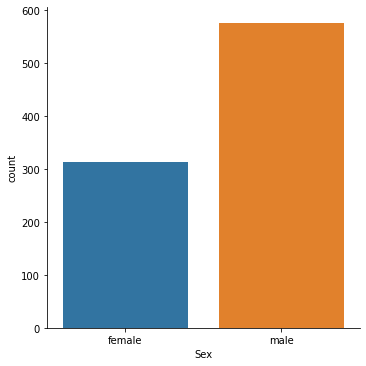

In [ ]:
sns.catplot(x='Sex', data=train_data, kind='count')

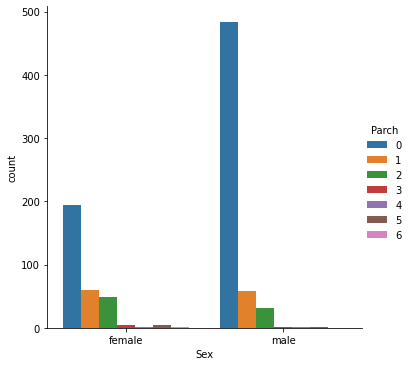

In [ ]:
sns.catplot(x='Sex', data=train_data, hue='Parch',kind='count')

### **Class Plot**

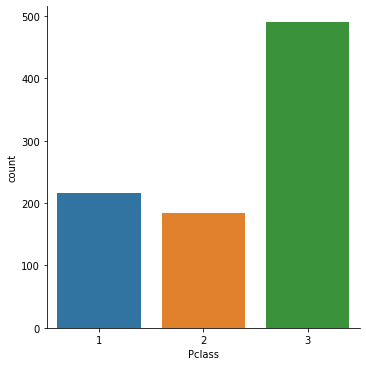

In [ ]:
sns.catplot(x='Pclass', data=train_data, kind='count')

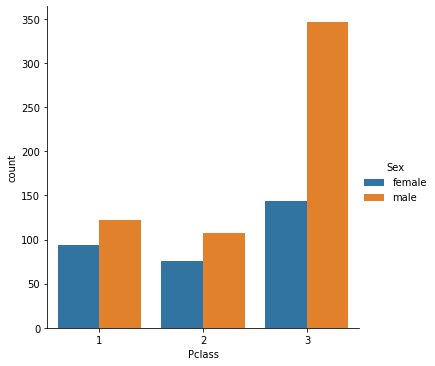

In [ ]:
sns.catplot(x='Pclass', data=train_data, hue='Sex',kind='count')

### **Ages of Passenger**

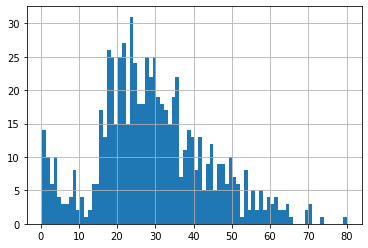

In [ ]:
train_data['Age'].hist(bins=80)

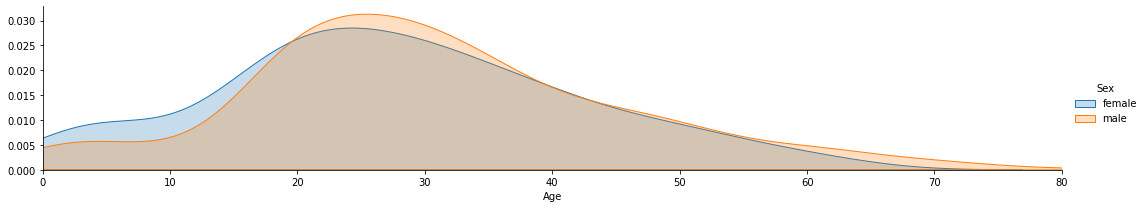

In [ ]:
as_fig = sns.FacetGrid(train_data,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train_data['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

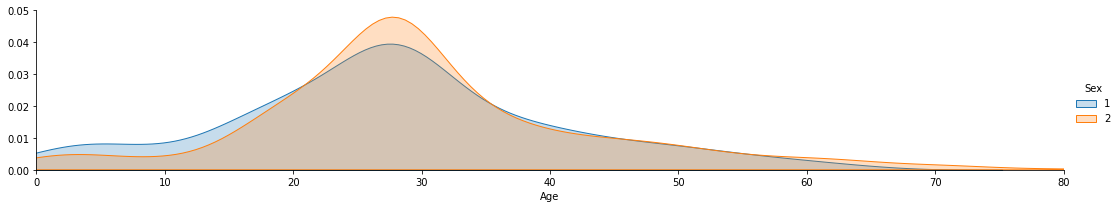

In [ ]:
as_fig = sns.FacetGrid(train,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

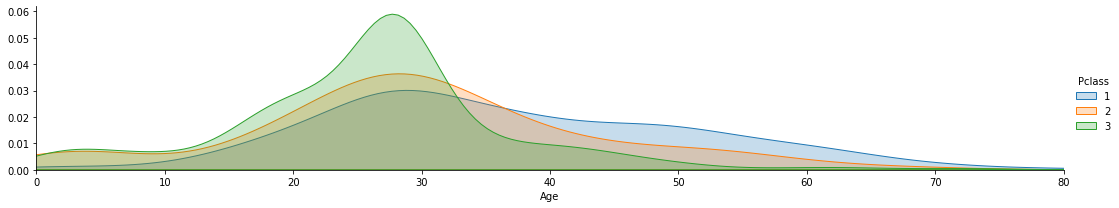

In [ ]:
as_fig = sns.FacetGrid(train,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

In [ ]:
# Average Age 

train_data['Age'].mean()

29.69911764705882

In [ ]:
train['Age'].mean()

29.36158249158249

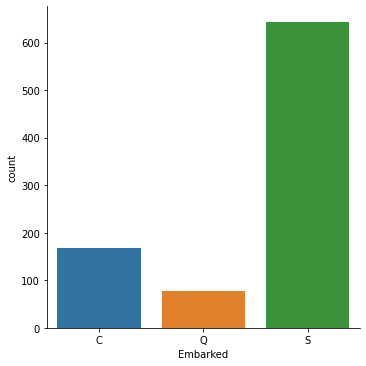

In [ ]:
sns.catplot(x='Embarked', data=train_data, kind='count')

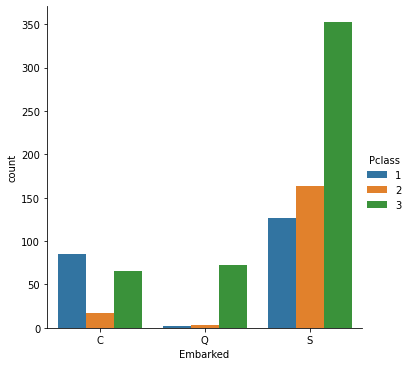

In [ ]:
sns.catplot(x='Embarked', data=train_data, hue='Pclass',kind='count')

* Creating the new column for konowing those people who were alone on the Ship

In [92]:
train_data['Alone'] = train_data.Parch + train_data.SibSp

In [93]:
train_data.Alone.isnull().sum()

0

In [94]:
train_data.Alone.loc[train_data.Alone > 0] = 'With Family'
train_data.Alone.loc[train_data.Alone == 0] = 'Without Family'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


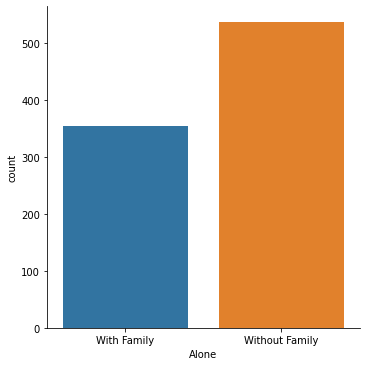

In [30]:
sns.catplot(x = 'Alone', data=train_data, kind='count')

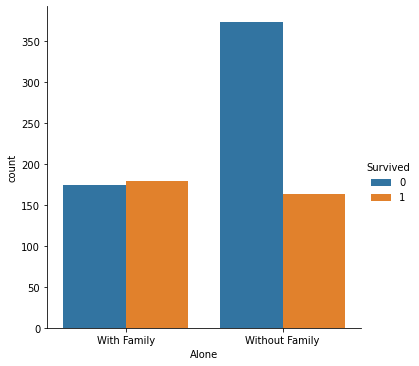

In [31]:
sns.catplot(x = 'Alone', data=train_data, hue='Survived',kind='count')

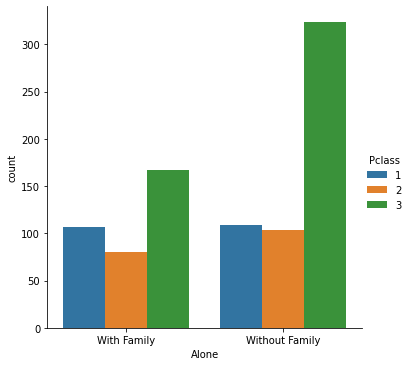

In [32]:
sns.catplot(x = 'Alone',kind='count',data=train_data,hue='Pclass')

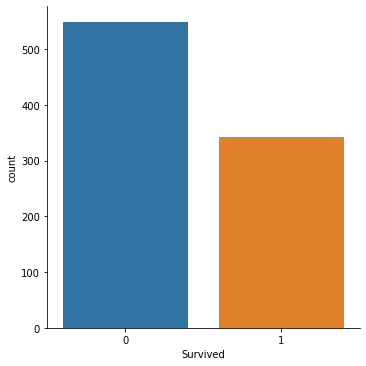

In [33]:
sns.catplot(x = 'Survived',data=train_data,kind='count')

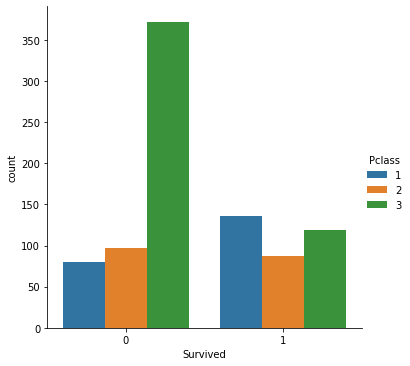

In [34]:
sns.catplot(x = 'Survived',data=train_data,kind='count',hue='Pclass')

Creating new column `person` which contain the type of the person is weather he/she is `MALE` `Female` and `Child`

In [91]:
def titanic_children(passenger):
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
train_data['person'] = train_data[['Age','Sex']].apply(titanic_children,axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


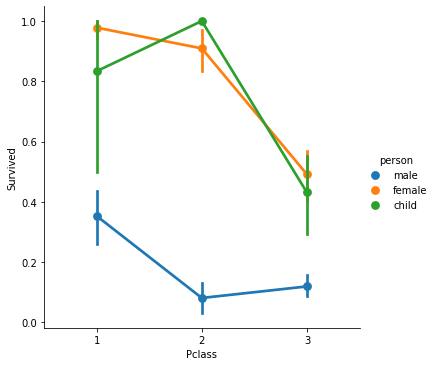

In [37]:
sns.factorplot(x = 'Pclass', y = 'Survived',data=train_data,hue='person')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


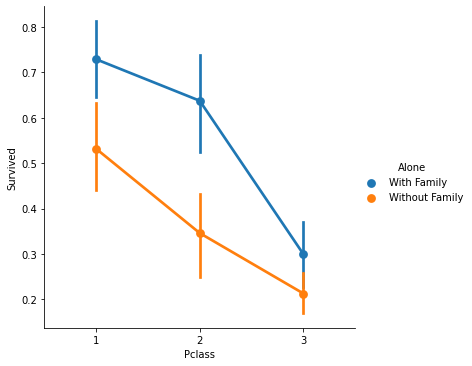

In [38]:
sns.factorplot('Pclass','Survived',data=train_data,hue='Alone')

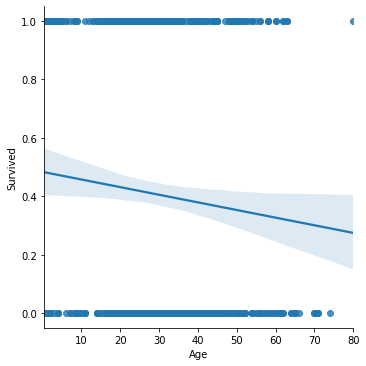

In [39]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data)

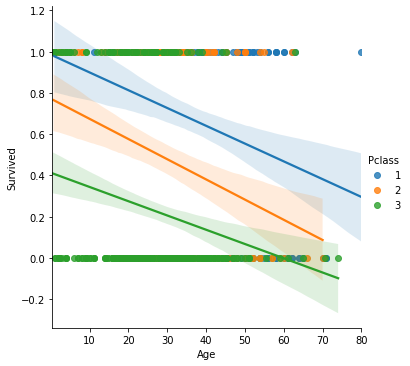

In [40]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Pclass')

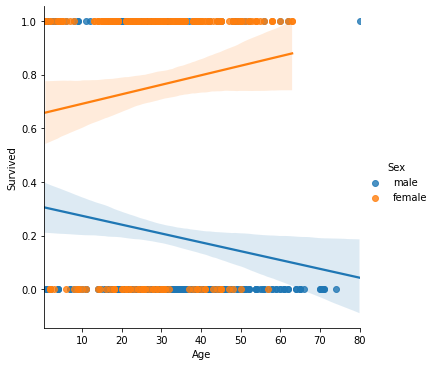

In [41]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Sex')

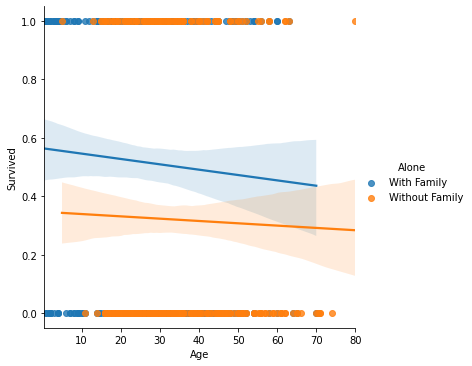

In [42]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Alone')

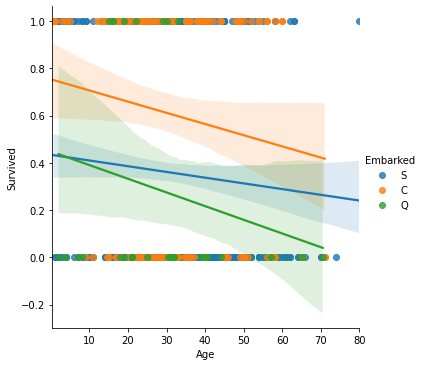

In [43]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Embarked')

# Decision Tree

In [95]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,2,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,2,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,28.0,1,2,23.4500,3
889,1,2,26.0,0,0,30.0000,1


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import  tree

In [97]:
cls = DecisionTreeClassifier()

In [98]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
cls.score(test, test_target)

0.7703349282296651

> * For improving the accuracy we do Hyperparameter tuning for improving the accuracy of the model

In [100]:
cls = DecisionTreeClassifier(max_depth=3)

In [101]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
cls.score(test, test_target)*100

96.65071770334929

In [103]:
cls = DecisionTreeClassifier(max_depth=3, max_features=4)

In [104]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
cls.score(test, test_target)*100

97.1291866028708

> * Now we combine the predicted values of test data and the actual values of test data together in on dataframe
> * and also save the dataframe in format of `.csv` file 

In [106]:
predicted = cls.predict(test)

In [107]:
predicted_value = np.reshape(predicted, (len(predicted), 1))

In [108]:
predicted_df = pd.DataFrame(data=predicted_value, columns=["Predicted Values"])

In [109]:
predicted_df

,Predicted Values
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [112]:
result = pd.concat([submission_data, predicted_df], axis=1)

In [113]:
result

,PassengerId,Survived,Predicted Values
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [114]:
result.to_csv('prediction.csv', index=False)

In [115]:
result.loc[result['Survived'] == result['Predicted Values'], 'Accurate'] = 'True' 
result.loc[result['Survived'] != result['Predicted Values'], 'Accurate'] = 'False' 

In [116]:
result

,PassengerId,Survived,Predicted Values,Accurate
0,892,0,0,True
1,893,1,1,True
2,894,0,0,True
3,895,0,0,True
4,896,1,1,True
...,...,...,...,...
413,1305,0,0,True
414,1306,1,1,True
415,1307,0,0,True
416,1308,0,0,True


In [117]:
result.Accurate.value_counts()

True     406
False     12
Name: Accurate, dtype: int64

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
classifier = RandomForestClassifier()

In [126]:
classifier.fit(train, train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
classifier.score(test, test_target)*100

82.05741626794259

In [132]:
classifier = RandomForestClassifier(n_estimators=110, max_features=4, max_depth=2)

In [133]:
classifier.fit(train, train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
classifier.score(test, test_target)*100

99.52153110047847

In [135]:
predicted = classifier.predict(test)

In [136]:
predicted_value = np.reshape(predicted, (len(predicted), 1))

In [137]:
predicted_df = pd.DataFrame(data=predicted_value, columns=["Predicted Values"])

In [138]:
new_data = pd.concat([submission_data, predicted_df], axis=1)

In [139]:
new_data

,PassengerId,Survived,Predicted Values
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [140]:
result.to_csv('new_prediction.csv', index=False)

### Accuracy

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(test_target, predicted)

0.9952153110047847

### Feature Importance

> * We can get the important features

In [150]:
fi = rf_feat_importance(classifier, train); fi[:]

,cols,imp
1,Sex,0.646607
0,Pclass,0.159209
5,Fare,0.121887
2,Age,0.036647
3,SibSp,0.020323
6,Embarked,0.009713
4,Parch,0.005614


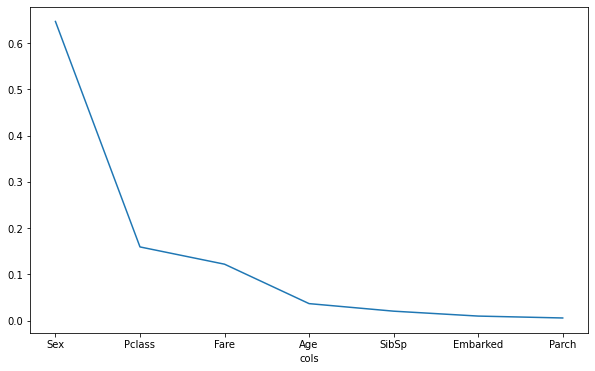

In [151]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [152]:
def plot_fi(fi): 
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

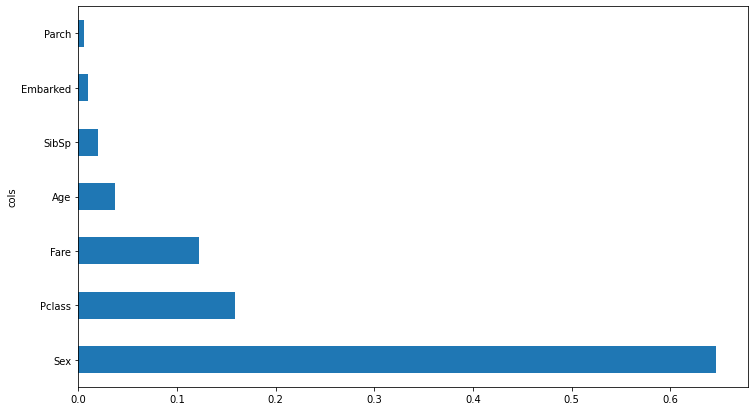

In [153]:
plot_fi(fi[:30]);

In [154]:
fn = train.columns
cn = [ str(val) for val in np.unique(test_target) ]
fn , cn

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object'),
 ['0', '1'])

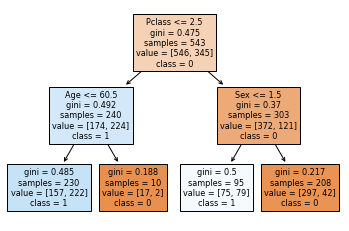

In [155]:
tree.plot_tree(classifier.estimators_[index], feature_names = fn, class_names=cn,filled = True);
                